# Problem Statement
### Given a dataset weekly_logins.csv! The goal is to find the categories or groups in the dataset that had high engagement (weekly logins) levels! 

In [74]:
#import required libraries
#analysis and manipulation libraries
import numpy as np
import pandas as pd

#visualizations
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [21]:
#read csv
df = pd.read_csv('weekly_logins.csv')
df.head() #display first five rows

,User Name,Slack Integration,Most Used Page,Had Free Trial,User MRR,Weekly Logins,Company Name,Industry,Company Size,Territory,Sales Call in Trial,Zendesk Integration,Salesforce Integration,Gmail Integration,Most common referrer,Most common IP,Sales Touches to Close,Used Admin Panel,Has Issued Support Request
0,Nilsa Harmon,No,/home,No,39,2,HP,Technology,>$10B,West,No,Yes,No,Yes,hotels.com,165.227.215.62,5,No,No
1,Joni Catano,No,/tool/storyboard,No,39,6,HP,Technology,>$10B,West,No,Yes,Yes,No,hotels.com,159.203.166.41,16,No,Yes
2,Emmett Jeffries,Yes,/tool/search,Yes,169,3,HP,Technology,>$10B,West,Yes,No,Yes,No,hotels.com,159.203.166.41,4,No,Yes
3,Dian Boisse,No,/tool/storyboard,No,39,2,HP,Technology,>$10B,West,No,Yes,No,No,zoom.com,162.243.108.129,15,No,Yes
4,Barbara Herrera,No,/tool/storyboard,No,1299,7,HP,Technology,>$10B,West,No,No,Yes,No,/mail.google.com,159.203.166.41,5,No,Yes


# Data Exploration

In [23]:
df.info() #gives basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User Name                   1718 non-null   object
 1   Slack Integration           1718 non-null   object
 2   Most Used Page              1718 non-null   object
 3   Had Free Trial              1718 non-null   object
 4   User MRR                    1718 non-null   int64 
 5   Weekly Logins               1718 non-null   int64 
 6   Company Name                1718 non-null   object
 7   Industry                    1718 non-null   object
 8   Company Size                1718 non-null   object
 9   Territory                   1718 non-null   object
 10  Sales Call in Trial         1718 non-null   object
 11  Zendesk Integration         1718 non-null   object
 12  Salesforce Integration      1718 non-null   object
 13  Gmail Integration           1718 non-null   obje

In [24]:
df.describe() #gives statistical information about numerical variables

,User MRR,Weekly Logins,Sales Touches to Close
count,1718.000000,1718.000000,1718.000000
mean,212.364377,6.065774,9.929569
std,367.568435,3.847528,3.705564
min,39.000000,0.000000,4.000000
25%,39.000000,3.000000,7.000000
50%,39.000000,5.000000,10.000000
75%,169.000000,8.000000,13.000000
max,1299.000000,17.000000,16.000000


In [25]:
df.isnull().sum() #check null values

User Name                     0
Slack Integration             0
Most Used Page                0
Had Free Trial                0
User MRR                      0
Weekly Logins                 0
Company Name                  0
Industry                      0
Company Size                  0
Territory                     0
Sales Call in Trial           0
Zendesk Integration           0
Salesforce Integration        0
Gmail Integration             0
Most common referrer          0
Most common IP                0
Sales Touches to Close        0
Used Admin Panel              0
Has Issued Support Request    0
dtype: int64

In [26]:
df.nunique() #returns count of unique value in each column of the dataset

User Name                     1716
Slack Integration                2
Most Used Page                   6
Had Free Trial                   2
User MRR                         3
Weekly Logins                   18
Company Name                    23
Industry                         8
Company Size                     5
Territory                        3
Sales Call in Trial              2
Zendesk Integration              2
Salesforce Integration           2
Gmail Integration                2
Most common referrer             8
Most common IP                  20
Sales Touches to Close          13
Used Admin Panel                 2
Has Issued Support Request       2
dtype: int64

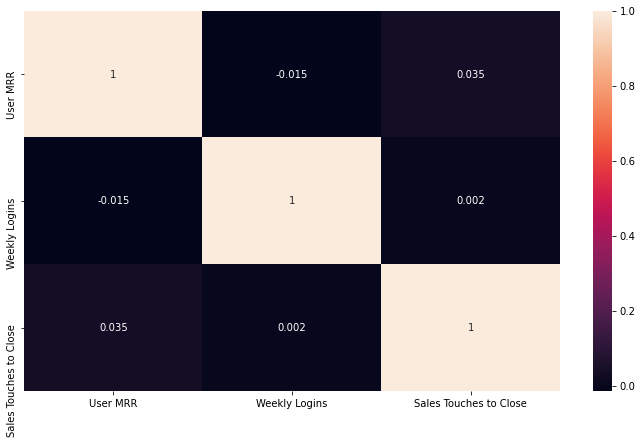

In [30]:
#heatmap - Check correlation between the numerical variables
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot = True) 

### Here, from heatmap we can observe there is no correlation between Weekly logins and User MRR (-0.015). 
### Similarly, no correlation between Sales Touches to Close and Weekly Logins (0.035)!! 
### Hence, no much impact!!

# Correlation between Categorical variables and Weekly Logins

In [41]:
#checking weekly logins of users group by their company
df.groupby('Company Name')['Weekly Logins'].mean().sort_values(ascending=False) 

Company Name
One Legal                        8.000000
Whitesell Corporation            6.733333
Worldsource Wealth Management    6.532847
Huron Consulting Group           6.523810
US Soccer Federation             6.518797
Veritext                         6.500000
InVision                         6.352941
Zendesk                          6.337500
SpaceX                           6.336957
Siemon                           6.305085
Yahoo! Inc.                      6.242424
Lush                             6.153846
Lucky Brand                      6.136986
Twilio                           6.086957
HP                               5.985507
LiveRamp                         5.985507
TaxSlayer, LLC                   5.970000
Hushmail                         5.915663
Uniform Law Commission           5.684932
Wal-Mart Stores                  5.671642
Visa                             5.375000
Stupp Bros                       5.330000
Zoom Video Communications        4.877551
Name: Weekly Logins, 

In [96]:
dat = df.groupby('Company Name')['Weekly Logins'].mean().sort_values(ascending=False).reset_index()
dat

,Company Name,Weekly Logins
0,One Legal,8.000000
1,Whitesell Corporation,6.733333
2,Worldsource Wealth Management,6.532847
3,Huron Consulting Group,6.523810
4,US Soccer Federation,6.518797
5,Veritext,6.500000
6,InVision,6.352941
7,Zendesk,6.337500
8,SpaceX,6.336957
9,Siemon,6.305085


<BarContainer object of 23 artists>

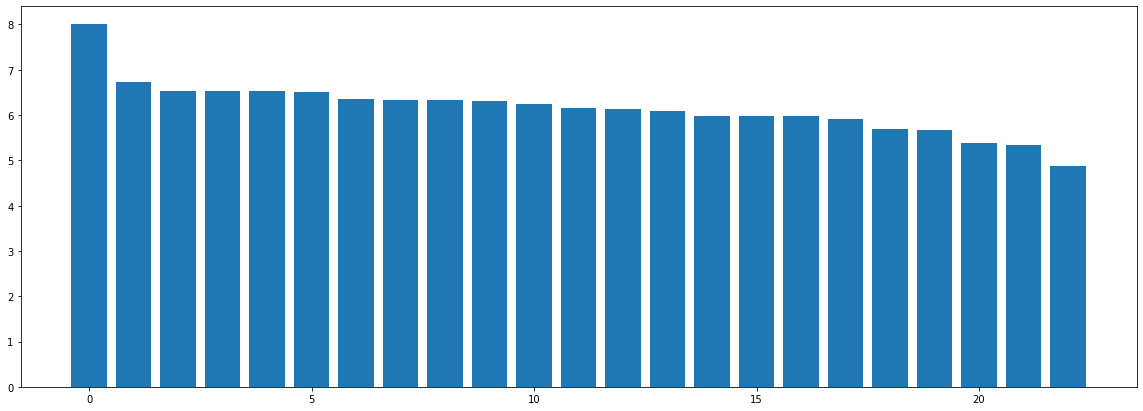

In [94]:
fig = plt.figure(figsize = (20,7)) #setting plot size
plt.bar(range(len(dat)), dat['Weekly Logins']) #plotting a bargraph for company data weekly logins     

### From the above analysis we can see "One Legal" company users have highest average weekly logins(8) followed by "whiteshell corporation", "worldsource management" ...

In [40]:
#checking weekly logins of users group by their Industry
df.groupby('Industry')['Weekly Logins'].mean().sort_values(ascending=False)

Industry
Finance                  6.532847
Professional Services    6.523810
Hospitality              6.517007
Legal Services           6.275510
Consumer Products        6.141414
Technology               5.936313
Manufacturing            5.914163
Other                    5.671642
Name: Weekly Logins, dtype: float64

### Finace, Professional services and Hospitality industries are top in average logins followed by Legal services, consumer products

In [42]:
#checking weekly logins of users group by Slack Integration feature
df.groupby('Slack Integration')['Weekly Logins'].mean().sort_values(ascending=False)

Slack Integration
Yes    9.953125
No     4.694488
Name: Weekly Logins, dtype: float64

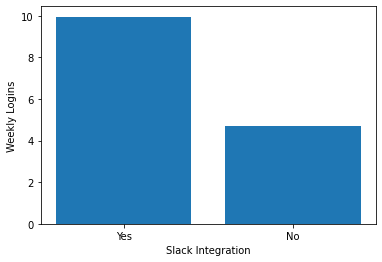

In [82]:
#representing slack integration vs weekly logins on a bar graph
dat = df.groupby('Slack Integration')['Weekly Logins'].mean().sort_values(ascending=False).reset_index()
fig = plt.figure(figsize = (6,4))
plt.bar(range(len(dat)), dat['Weekly Logins'])
plt.xticks(range(len(dat)), dat['Slack Integration'] )
plt.xlabel('Slack Integration')
plt.ylabel('Weekly Logins');

### Users having slack integration tend to have more logins compare to no slack integration users! So, slack integration matters !!

In [43]:
#check which page has been mostly used by the weekly login users!
df.groupby('Most Used Page')['Weekly Logins'].mean().sort_values(ascending=False)

Most Used Page
/tool/storyboard     6.542264
/tool/search         4.432836
/dashboard           4.180328
/tool/build_query    4.080645
/home                3.661765
/login               3.656250
Name: Weekly Logins, dtype: float64

### Users with more average logins are using "/tool/storyboard " page followed by "/tool/search" and "/dashboard"! Storyboard page is the most used page!! So, make sure storyboard page should be glitch free!!

In [44]:
#check whether free trial had impact on weekly logins!
df.groupby('Had Free Trial')['Weekly Logins'].mean().sort_values(ascending=False)

Had Free Trial
Yes    10.006504
No      3.868540
Name: Weekly Logins, dtype: float64

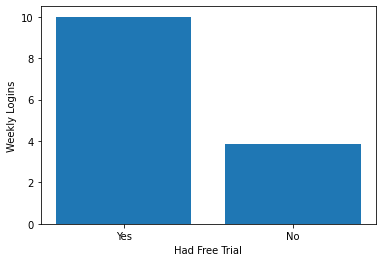

In [95]:
#barplot representation for the Had free trial vs weekly logins
dat = df.groupby('Had Free Trial')['Weekly Logins'].mean().sort_values(ascending=False).reset_index()
fig = plt.figure(figsize = (6,4))
plt.bar(range(len(dat)), dat['Weekly Logins'])
plt.xticks(range(len(dat)), dat['Had Free Trial'] )
plt.xlabel('Had Free Trial')
plt.ylabel('Weekly Logins');

### Having Free trials has positive impact on weekly logins. Users with free trail have more average logins compare to users who doesn't have! Hence, free trial plays an important role!

In [45]:
#check company size has impact on weekly logins
df.groupby('Company Size')['Weekly Logins'].mean().sort_values(ascending=False)

Company Size
$500M - $1B      6.401639
<$100M           6.308333
$1B - $10B       6.297468
$100M - $500M    6.023810
>$10B            5.596429
Name: Weekly Logins, dtype: float64

### Company Size has no relation with weekly logins!! Here, company size with 500 Million dollars - 1 Billion dollars has highest avg logins and company size with greater then 10Billion dollars has least avg weekly logins!! 
### That clearly means there is no specific relation between these two variables.

In [46]:
#check territory has impact on weekly logins
df.groupby('Territory')['Weekly Logins'].mean().sort_values(ascending=False)

Territory
East       6.430446
Midwest    6.021154
West       5.924113
Name: Weekly Logins, dtype: float64

### There is no substantial difference in Weekly Logins among Territories. However, companies on east has highest avg weekly logins followed by midwest and west!!

In [47]:
#check sales call in trial has impact on weekly logins
df.groupby('Sales Call in Trial')['Weekly Logins'].mean().sort_values(ascending=False)

Sales Call in Trial
Yes    6.188341
No     5.987607
Name: Weekly Logins, dtype: float64

### Sales call in Trial has negligible impact on Avg weekly logins

In [97]:
#check whether zendesk integration is helping to improve weekly logins
df.groupby('Zendesk Integration')['Weekly Logins'].mean().sort_values(ascending=False)

Zendesk Integration
Yes    6.157438
No     5.959849
Name: Weekly Logins, dtype: float64

### Having Zendesk integration has negligible impact on avg weekly logins

In [52]:
#check salesforce integration has impact on weekly logins
df.groupby('Salesforce Integration')['Weekly Logins'].mean().sort_values(ascending=False)

Salesforce Integration
Yes    6.130435
No     6.019900
Name: Weekly Logins, dtype: float64

### Having Salesforce integration has negligible impact on avg weekly logins

In [53]:
#check gmail integration has impact on weekly logins
df.groupby('Gmail Integration')['Weekly Logins'].mean().sort_values(ascending=False)

Gmail Integration
No     6.167526
Yes    5.981953
Name: Weekly Logins, dtype: float64

### Having Gmail integration has negligible impact on avg weekly logins

In [54]:
#check which referrer has more impact on weekly logins
df.groupby('Most common referrer')['Weekly Logins'].mean().sort_values(ascending=False)

Most common referrer
/mail.google.com    6.342342
/google.com         6.325581
hotels.com          6.146226
/slack.com          6.113122
/tripadvisor.com    5.976636
/facebook.com       5.966981
/quora              5.844037
zoom.com            5.789216
Name: Weekly Logins, dtype: float64

### The refferrer's has not much impact on the weekly logins! Most of the traffic is from gmail.com followed by organic search users (google.com) then we have referrals like hotels.com, slack.com..

In [55]:
#check if users used admin panel has impact on weekly logins
df.groupby('Used Admin Panel')['Weekly Logins'].mean().sort_values(ascending=False)

Used Admin Panel
Yes    6.074278
No     6.059536
Name: Weekly Logins, dtype: float64

### Users used admin panel have no impact on avg weekly logins!

In [56]:
#check id user has issued support request has impact on weekly logins
df.groupby('Has Issued Support Request')['Weekly Logins'].mean().sort_values(ascending=False)

Has Issued Support Request
Yes    6.183673
No     5.926302
Name: Weekly Logins, dtype: float64

### Users who has issued support request has negligible impact on avg weekly logins!

# Conclusion

## To Summarize, 

### 1. Considering the analysis, the varibales like 'Slack Integration', 'Had Free Trial' have very  much positive impact on the average weekly logins!

### 2. Considering the traffic, most of the users come from 'gmail.com' and 'organic search'(google.com)! Try not to minimize the cost on paid referrals!

### 3. Varibles like 'Gmail Integration', 'Salesforce Integration', 'Zendesk Integration', has very negligible impact on weekly logins. Company can run asusual without integrating these softwares! Company has got chance to save some money!

### 4. The most used page by the users is '/tool/storyboard'. Make sure we always have this page up and running glitch free. Try to implement any important features in other pages to attract the traffic.

### 5. Companies on the east coast have little higher logins than midwest and west! Should come up with a strategy to improve weekly login in midwest and west coast territories!

### 6. 'One Legal' company has highest average weekly logins!

### 7. 'Company Size', 'User MRR', 'Sales Touch to Close' has no impact on the average weekly logins!

